In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import models
from keras import layers

normalized_data = pd.read_csv("normalized_data_with_predicted_age.csv", index_col=0)
normalized_data 

Using TensorFlow backend.


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,SOTON/O.Q.,2.,W./C.,STON/O,CA.,A/5,SC/PARIS,2343,CA,A/5.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.271174,0.2,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.472229,0.2,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.434531,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,1.0,0.286507,0.0,0.000000,0.015070,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1302,NaN,1.0,0.286510,0.0,0.000000,0.015127,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,NaN,1.0,0.354261,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split data into train and test

In [2]:
normalized_train_data = normalized_data[normalized_data.Survived.notna()]
normalized_test_data = normalized_data[normalized_data.Survived.isna()]
normalized_train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,SOTON/O.Q.,2.,W./C.,STON/O,CA.,A/5,SC/PARIS,2343,CA,A/5.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.271174,0.2,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.472229,0.2,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.434531,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0.0,1.0,0.352760,0.0,0.000000,0.014110,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
864,0.0,1.0,0.175585,1.6,0.333333,0.135753,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
869,0.0,1.0,0.354312,0.0,0.000000,0.018543,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating model

In [3]:
x_train = normalized_train_data.drop(["Survived"], axis=1)
y_train = normalized_train_data["Survived"].values
model = models.Sequential()
model.add(layers.Dense(x_train.shape[1], activation="relu", input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 427us/step - loss: 0.6650 - acc: 0.6011 - val_loss: 0.5891 - val_acc: 0.8156
Epoch 2/100
712/712 [==============================] - 0s 157us/step - loss: 0.6087 - acc: 0.6854 - val_loss: 0.5427 - val_acc: 0.8101
Epoch 3/100
712/712 [==============================] - 0s 137us/step - loss: 0.6064 - acc: 0.7261 - val_loss: 0.5136 - val_acc: 0.8101
Epoch 4/100
712/712 [==============================] - 0s 145us/step - loss: 0.5582 - acc: 0.7472 - val_loss: 0.4918 - val_acc: 0.8101
Epoch 5/100
712/712 [==============================] - 0s 138us/step - loss: 0.5362 - acc: 0.7598 - val_loss: 0.4807 - val_acc: 0.8101
Epoch 6/100
712/712 [==============================] - 0s 141us/step - loss: 0.5374 - acc: 0.7683 - val_loss: 0.4712 - val_acc: 0.8101
Epoch 7/100
712/712 [==============================] - 0s 136us/step - loss: 0.5382 - acc: 0.7711 - val_loss: 0.4655 - val_acc: 0.8045
Epoch 8/1

Epoch 61/100
712/712 [==============================] - 0s 138us/step - loss: 0.4267 - acc: 0.8216 - val_loss: 0.4206 - val_acc: 0.8380
Epoch 62/100
712/712 [==============================] - 0s 125us/step - loss: 0.4389 - acc: 0.8244 - val_loss: 0.4225 - val_acc: 0.8268
Epoch 63/100
712/712 [==============================] - 0s 129us/step - loss: 0.4336 - acc: 0.8202 - val_loss: 0.4220 - val_acc: 0.8380
Epoch 64/100
712/712 [==============================] - 0s 125us/step - loss: 0.4282 - acc: 0.8343 - val_loss: 0.4256 - val_acc: 0.8268
Epoch 65/100
712/712 [==============================] - 0s 130us/step - loss: 0.4251 - acc: 0.8301 - val_loss: 0.4173 - val_acc: 0.8380
Epoch 66/100
712/712 [==============================] - 0s 136us/step - loss: 0.4242 - acc: 0.8244 - val_loss: 0.4248 - val_acc: 0.8380
Epoch 67/100
712/712 [==============================] - 0s 138us/step - loss: 0.4417 - acc: 0.8301 - val_loss: 0.4235 - val_acc: 0.8380
Epoch 68/100
712/712 [==========================

## Drawing plots

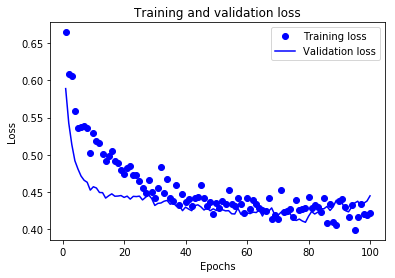

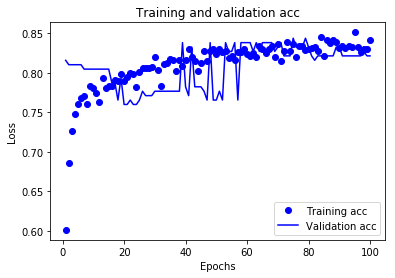

In [4]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Evaluate results

In [5]:
results = model.predict(normalized_test_data.drop(["Survived"], axis=1))
results = pd.DataFrame(results, columns=["Survived"], index=normalized_test_data.index)

results.loc[results.Survived < 0.5, ["Survived"]] = 0
results.loc[results.Survived >= 0.5, ["Survived"]] = 1
results = results.fillna(0)
results.Survived = results.Survived.astype(int)
results

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1300,1
1302,1
1305,0


## Save results

In [6]:
results.to_csv("Output/my_prediction.csv", index=True)

## Compare with genderr submission

In [7]:
compare = pd.read_csv("Dataset/gender_submission.csv", index_col=0)
# compare = pd.read_csv("7799.csv", index_col=0)
compare = compare.rename(columns={"Survived": "Example"})
compare = pd.concat([compare, results], axis=1)
compare = compare.rename(columns={"Survived": "MyPrediction"})
compare[compare.Example != compare.MyPrediction]

,Example,MyPrediction
PassengerId,,
893,1,0
896,1,0
898,1,0
913,0,1
925,1,0
928,1,0
929,1,0
956,0,1
964,1,0
